# Analysis of RMSE and ME

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


### Read data table

In [401]:

fn = 'E:/Projects/SEACAR_WQ_2024/result/result_v2/rk_idw_comp.xlsx'  # Replace 'yourfile.csv' with the path to your CSV file

df = pd.read_excel(fn, engine='openpyxl')
df2 = pd.read_excel(fn, sheet_name='RK_IDW', engine='openpyxl')

### Rename columns

In [402]:
# Identify the method with lowest RMSE and ME
df.loc[df['lowest_RMSE'].str.contains('_rk', case=False, na=False), 'lowest_RMSE2'] = 'RK'
df.loc[df['lowest_RMSE'].str.contains('_idw', case=False, na=False), 'lowest_RMSE2'] = 'IDW'

df.loc[df['lowest_abs_ME'].str.contains('_rk', case=False, na=False), 'lowest_abs_ME2'] = 'RK'
df.loc[df['lowest_abs_ME'].str.contains('_idw', case=False, na=False), 'lowest_abs_ME2'] = 'IDW'

df2.loc[df2['lowest_RMSE'].str.contains('_rk', case=False, na=False), 'lowest_RMSE2'] = 'RK'
df2.loc[df2['lowest_RMSE'].str.contains('_idw', case=False, na=False), 'lowest_RMSE2'] = 'IDW'

df2.loc[df2['lowest_abs_ME'].str.contains('_rk', case=False, na=False), 'lowest_abs_ME2'] = 'RK'
df2.loc[df2['lowest_abs_ME'].str.contains('_idw', case=False, na=False), 'lowest_abs_ME2'] = 'IDW'

# Identify seasons interpolated by RK and IDW respectively
df.loc[(pd.notna(df['RMSE_rk'])) & (df['RMSE_rk'] != ''), 'processed_by_RK'] = 'RK'
df.loc[(pd.notna(df['RMSE_idw_all'])) & (df['RMSE_idw_all'] != ''), 'processed_by_IDW'] = 'IDW'

## Percent of interpolatable seasons

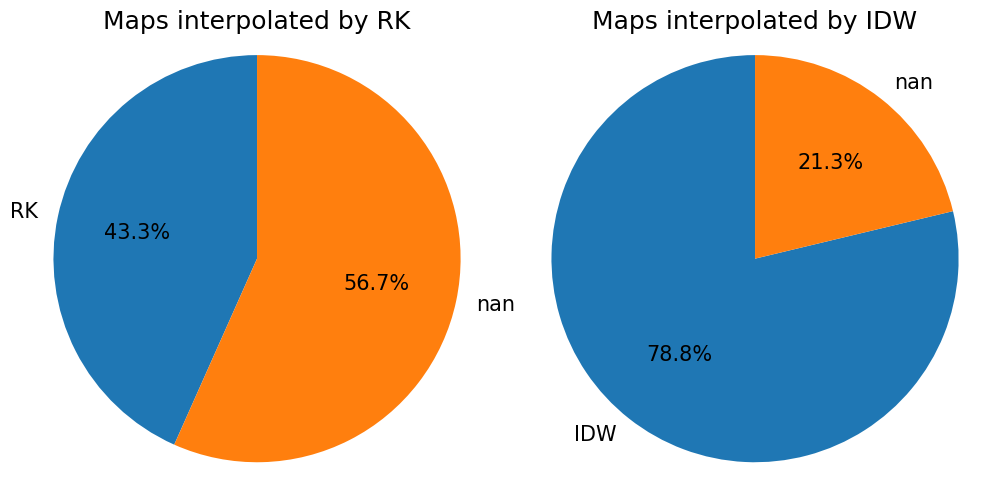

In [403]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['processed_by_RK'].value_counts(dropna=False).sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Maps interpolated by RK', fontsize=18) # Title

# Seasons with sufficient data
category_counts = df['processed_by_IDW'].value_counts(dropna=False).sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Maps interpolated by IDW', fontsize=18) # Title


# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

## RMSE comparison

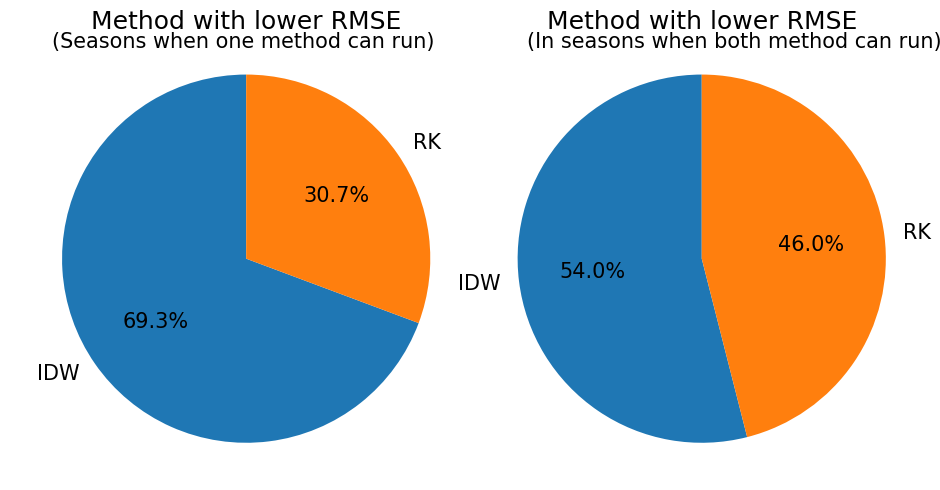

In [404]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['lowest_RMSE2'].value_counts().sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Method with lower RMSE', fontsize=18) # Title
axs[0].text(0.27, 1.07, '(Seasons when one method can run)', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# Seasons with sufficient data
category_counts = df2['lowest_RMSE2'].value_counts().sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Method with lower RMSE', fontsize=18) # Title
axs[1].text(1.6, 1.07, '(In seasons when both method can run)', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

## ME comparison

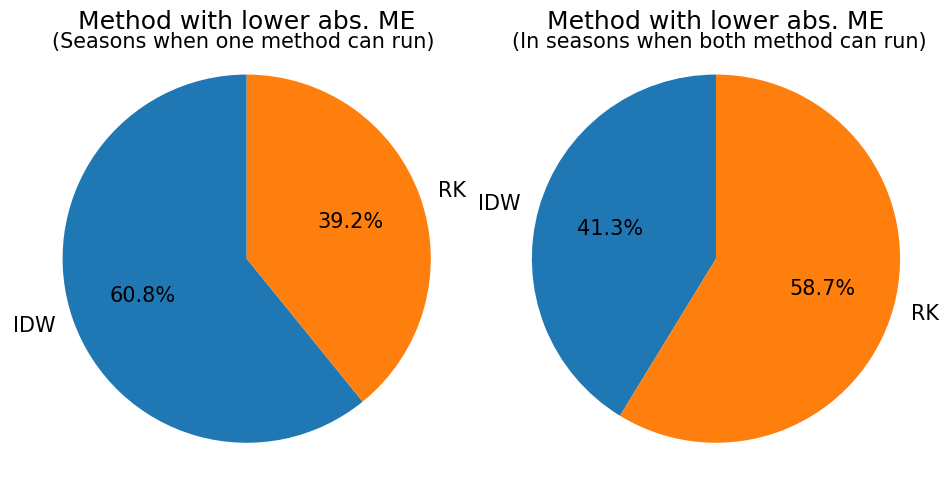

In [405]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['lowest_abs_ME2'].value_counts().sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Method with lower abs. ME', fontsize=18) # Title
axs[0].text(0.27, 1.07, '(Seasons when one method can run)', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# Seasons with sufficient data
category_counts = df2['lowest_abs_ME2'].value_counts().sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Method with lower abs. ME', fontsize=18) # Title
axs[1].text(1.56, 1.07, '(In seasons when both method can run)', fontsize=15, ha='center', va='center', transform=ax.transAxes)


# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

### The function to create scatter plots and regression analysis

In [414]:
def scatter_plot(water_body, err_metric, method, err_metric_col,fz1, fz2, ax):
    #df_nn = df.dropna(subset=['RMSE_idw_all'])
    df_nn = df[(df['WaterBody'] == water_body) & (df[err_metric_col] > -10000)].dropna(subset=[err_metric_col])

    # Calculate abs ME
    df_nn[err_metric_col] = df_nn[err_metric_col].abs()

    # Regression analysis
    # Add a constant term for the intercept
    X = sm.add_constant(df_nn['NumDataPoints_all'])
    model = sm.OLS(df_nn[err_metric_col], X).fit()

    # Fit a linear trendline
    slope, intercept = np.polyfit(df_nn['NumDataPoints_all'], df_nn[err_metric_col], 1)
    p_value = model.pvalues[1]

    # Creating a scatter plot using pandas
    df_nn.plot(kind='scatter', x='NumDataPoints_all', y=err_metric_col, ax = ax)

    # Add the trendline
    ax.plot(df_nn['NumDataPoints_all'], slope*df_nn['NumDataPoints_all'] + intercept, color='red', label=f'Trendline: y={m:.2f}x+{b:.2f}')


    ax.set_title('{} of {} in {}'.format(err_metric,method,water_body),fontsize=fz1)
    ax.set_xlabel('Sample size',fontsize=fz2)
    ax.set_ylabel(err_metric,fontsize=fz2)

    # Add a constant term for the intercept
    X = sm.add_constant(df_nn['NumDataPoints_all'])
    model = sm.OLS(df_nn[err_metric_col], X).fit()

    # Step 4: Add the regression equation to the plot
    equation_and_pvalue = f'y = {slope:.2f}x + {intercept:.2f} (p={p_value:.3g})'
    ax.text(min(df_nn['NumDataPoints_all']), max(df_nn[err_metric_col])*0.95, equation_and_pvalue, fontsize=fz2, verticalalignment='bottom', color='red')


# IDW
### RMSE v.s. Sample points (Charlotte Harbor, Big Bend, Biscayne Bay)

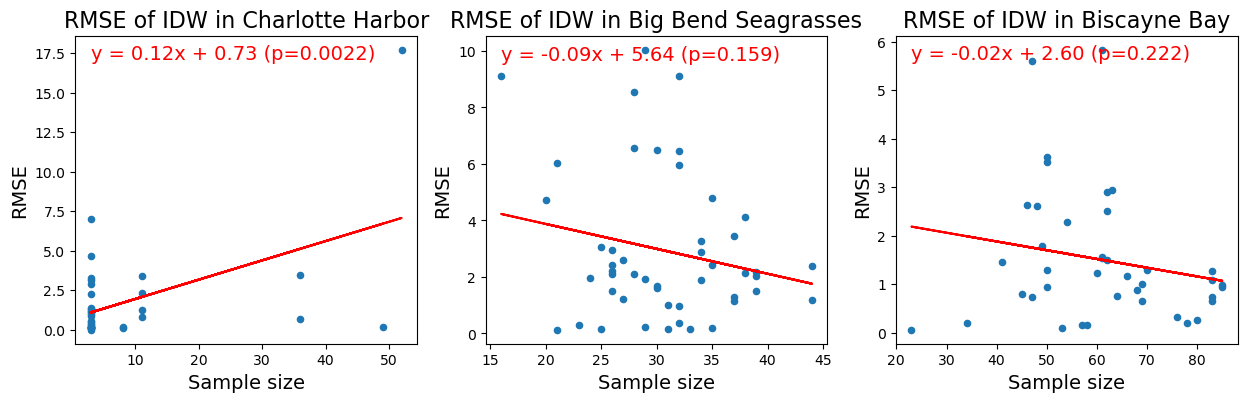

In [415]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
scatter_plot('Charlotte Harbor', 'RMSE','IDW','RMSE_idw_all',16,14, axs[0])
scatter_plot('Big Bend Seagrasses', 'RMSE','IDW','RMSE_idw_all',16,14, axs[1])
scatter_plot('Biscayne Bay', 'RMSE','IDW','RMSE_idw_all',16,14, axs[2])

### Abs. ME v.s. Sample points (Charlotte Harbor, Big Bend, Biscayne Bay)

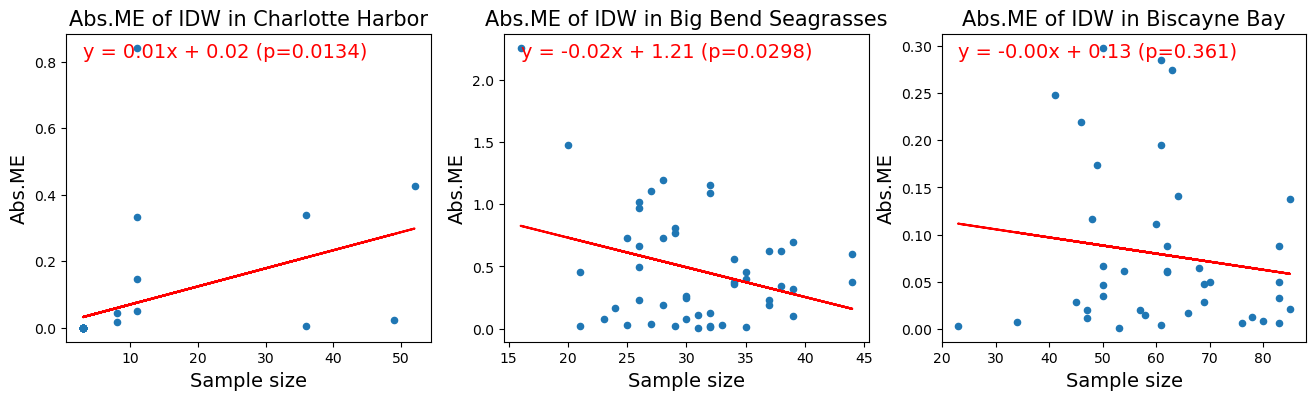

In [416]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

scatter_plot('Charlotte Harbor', 'Abs.ME','IDW','ME_idw_all',15,14, axs[0])
scatter_plot('Big Bend Seagrasses', 'Abs.ME','IDW','ME_idw_all',15,14, axs[1])
scatter_plot('Biscayne Bay', 'Abs.ME','IDW','ME_idw_all',15,14, axs[2])

# RK
### RMSE v.s. Sample points (Charlotte Harbor, Big Bend, Biscayne Bay)

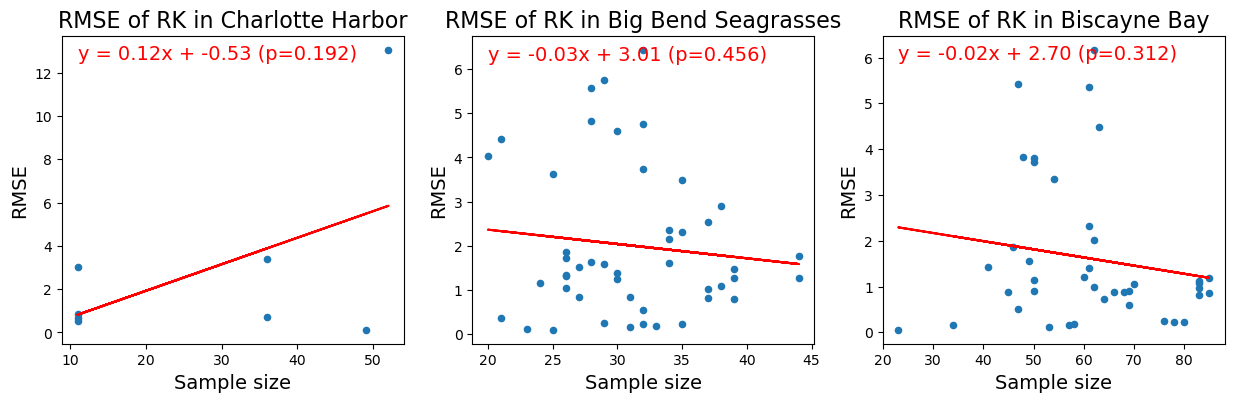

In [398]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
scatter_plot('Charlotte Harbor', 'RMSE','RK','RMSE_rk',16,14, axs[0])
scatter_plot('Big Bend Seagrasses', 'RMSE','RK','RMSE_rk',16,14, axs[1])
scatter_plot('Biscayne Bay', 'RMSE','RK','RMSE_rk',16,14, axs[2])

### Abs. ME v.s. Sample points (Charlotte Harbor, Big Bend, Biscayne Bay)

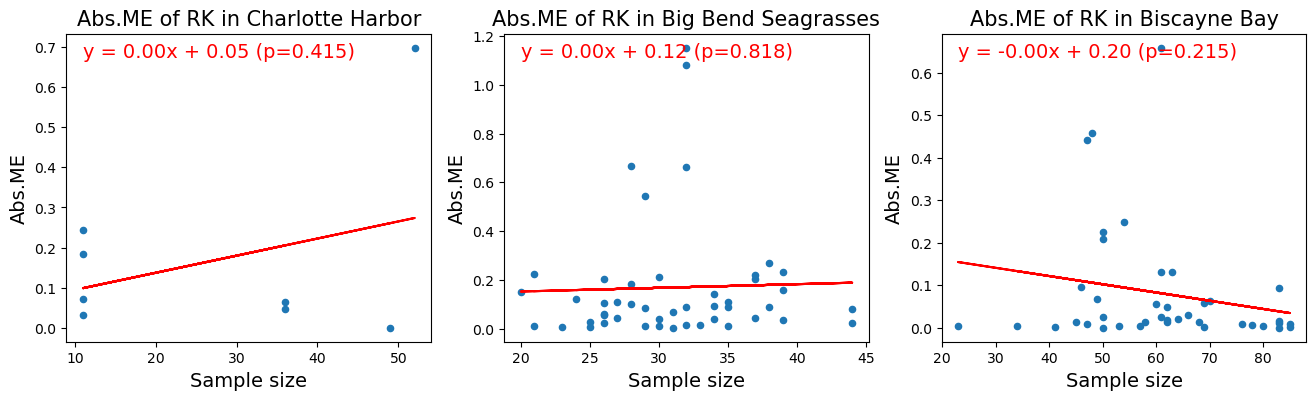

In [399]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

scatter_plot('Charlotte Harbor', 'Abs.ME','RK','ME_rk',15,14, axs[0])
scatter_plot('Big Bend Seagrasses', 'Abs.ME','RK','ME_rk',15,14, axs[1])
scatter_plot('Biscayne Bay', 'Abs.ME','RK','ME_rk',15,14, axs[2])